In [ ]:
!pip install diffusers peft accelerate transformers datasets safetensors bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
!git clone https://github.com/jasonfghx/retina_image.git

Cloning into 'retina_image'...
remote: Enumerating objects: 1693, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 1693 (delta 17), reused 0 (delta 0), pack-reused 1635 (from 2)
Receiving objects: 100% (1693/1693), 331.41 MiB | 15.54 MiB/s, done.
Resolving deltas: 100% (135/135), done.
Updating files: 100% (1406/1406), done.


In [ ]:
import os
os.makedirs("/content/retina_image/train")

In [ ]:
#你要放什麼圖用這邊
import shutil
from glob import glob
add=glob("/content/retina_image/Neo_Ridge/*png")
for i in add[:50]:
  name=i.split("/")[-1]
  shutil.copy(i,'/content/retina_image/train/'+name)

In [ ]:
!git clone https://github.com/huggingface/diffusers.git

Cloning into 'diffusers'...
remote: Enumerating objects: 100963, done.
remote: Counting objects: 100% (704/704), done.
remote: Compressing objects: 100% (390/390), done.
remote: Total 100963 (delta 554), reused 323 (delta 312), pack-reused 100259 (from 4)
Receiving objects: 100% (100963/100963), 75.30 MiB | 16.71 MiB/s, done.
Resolving deltas: 100% (74479/74479), done.


In [ ]:
%cd /content/diffusers

/content/diffusers


In [ ]:
!pip install -e .

In [ ]:
!accelerate launch examples/dreambooth/train_dreambooth_lora.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
  --instance_data_dir="/content/retina_image/train/" \
  --output_dir="/content/retina_image" \
  --instance_prompt="A photo of retina" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=1e-4 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=2 \
  --checkpointing_steps=500 \
  --use_8bit_adam \
  --mixed_precision="fp16" \
  --seed=42


The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2025-08-17 12:06:26.277982: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755432386.526694    1557 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755432386.596782    1557 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755432387.107346    1557 computation_plac

In [ ]:
import shutil
checkpoints_dir = "/content/retina_image/train/.ipynb_checkpoints"
if os.path.exists(checkpoints_dir):
    shutil.rmtree(checkpoints_dir)

In [ ]:
!pip install diffusers[torch] transformers accelerate safetensors

In [ ]:
from diffusers import StableDiffusionImg2ImgPipeline
import torch
from PIL import Image

# 載入模型和權重
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
).to("cuda")

# 載入你的 LoRA 權重
pipe.load_lora_weights("/content/retina_image/pytorch_lora_weights.safetensors")

# 載入輸入影像
init_image = Image.open("/content/retina_image/Neo_Ridge/43.png").convert("RGB")
init_image = init_image.resize((512, 512))  # 調整成模型大小

# 生成設定
prompt = "A photo of retina in gray color and mirror"
strength = 0.1  # 控制修改程度，越小越接近原圖
num_inference_steps = 50

# 生成
images = pipe(prompt=prompt, image=init_image, strength=strength, num_inference_steps=num_inference_steps).images

# 取出第一張圖並存檔
images[0].save("output_retina_img2img.png")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
len(images)

1

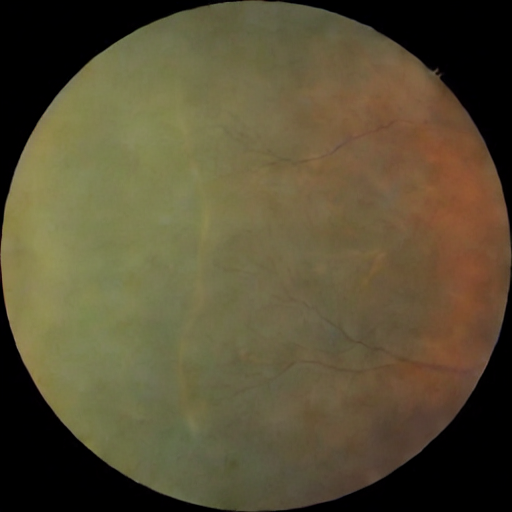

In [ ]:
images[0]

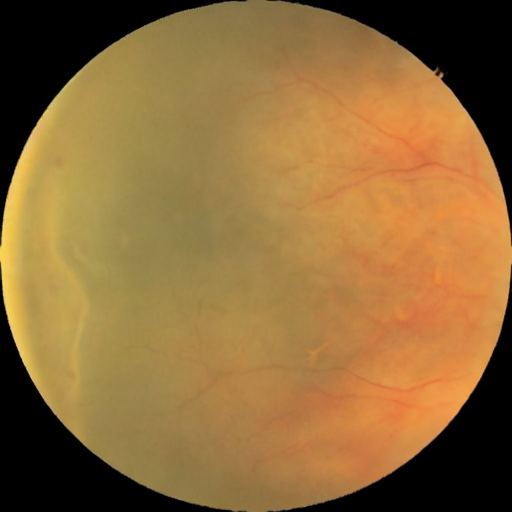

In [ ]:
images[0]

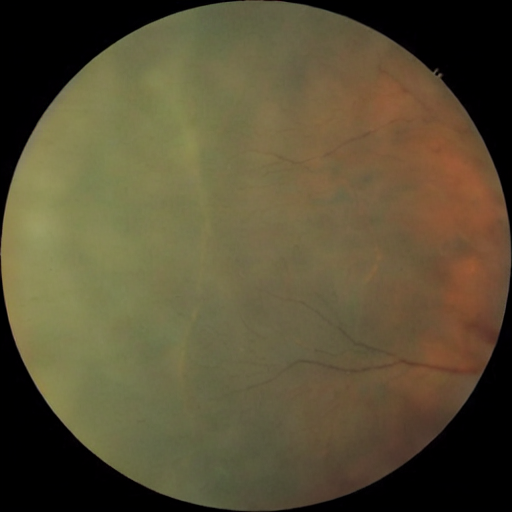

In [ ]:
images[0]

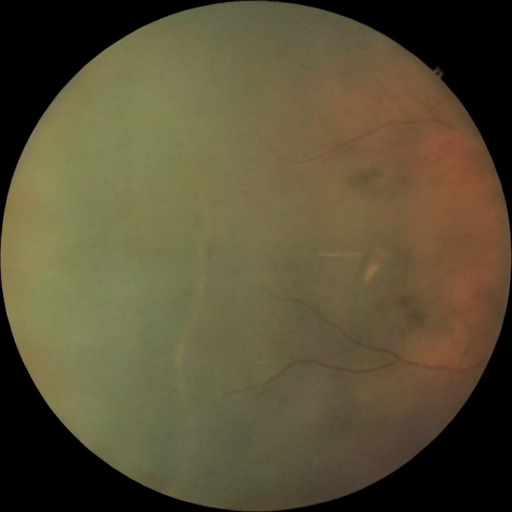

In [ ]:
images[0]

In [ ]:
! git clone https://github.com/arimousa/DDAD.git
! git clone https://github.com/jasonfghx/diffusion_g.git

Cloning into 'DDAD'...
remote: Enumerating objects: 527, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 527 (delta 39), reused 30 (delta 30), pack-reused 473 (from 1)
Receiving objects: 100% (527/527), 16.72 MiB | 20.85 MiB/s, done.
Resolving deltas: 100% (356/356), done.
Cloning into 'diffusion_g'...
remote: Enumerating objects: 449, done.
remote: Counting objects: 100% (449/449), done.
remote: Compressing objects: 100% (435/435), done.
remote: Total 449 (delta 134), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (449/449), 100.54 MiB | 31.22 MiB/s, done.
Resolving deltas: 100% (134/134), done.


In [ ]:
import os
os.makedirs('/content/DDAD/checkpoints')
os.makedirs('/content/DDAD/checkpoints/screw')

In [ ]:
!pip install -r /content/DDAD/requirements.txt

In [ ]:
cd /content/DDAD

/content/DDAD


In [ ]:
!python main.py --train True

In [ ]:
!pip install -q  git+https://github.com/huggingface/accelerate.git

In [ ]:
!pip install -U peft accelerate
!git clone https://github.com/jasonfghx/diffusion_g.git

remote: Compressing objects: 100% (439/439), done.
remote: Total 453 (delta 134), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (453/453), 101.14 MiB | 22.34 MiB/s, done.
Resolving deltas: 100% (134/134), done.


In [ ]:
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image


image = load_image(
    "/content/diffusion_g/X光影像_2025.8.13/Bag_158_August_13_2025_15_17_07.bmp"
)

import cv2
from PIL import Image
import numpy as np
image = np.array(image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)
w, h = canny_image.size
scale = 0.1  # 縮小到原來的一半
new_size = (int(w*scale), int(h*scale))
canny_image_resized = canny_image.resize(new_size)

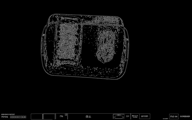

In [ ]:
canny_image_resized

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

prompt = ", best quality, extremely detailed"
# prompt = [t + prompt for t in ["gray", "mirror image", "fashion", "small"]]
prompt = [t + prompt for t in ["gray"]]
generator = [torch.Generator(device="cpu").manual_seed(2) for i in range(len(prompt))]

output = pipe(
    prompt,
    canny_image,
    negative_prompt=["monochrome, lowres, bad anatomy, worst quality, low quality"] * len(prompt),
    generator=generator,
    num_inference_steps=1,
)

# image_grid(output.images, 2, 2)

  0%|          | 0/1 [00:00<?, ?it/s]